# Sarcasm Detection on YouTube Comments - Data Preprocessing

This notebook demonstrates the steps for preprocessing a dataset for sarcasm detection in YouTube comments using deep learning. The preprocessing steps include loading the dataset, cleaning the data, text normalization, and preparing the data for model training.

## Dataset Overview

We are using a dataset of YouTube comments which contains the following columns:
- `comment`: The text of the YouTube comment.
- `label`: The target label indicating whether the comment is sarcastic (1) or not (0).

Let's load the dataset and take a look at its structure.



In [5]:
import numpy as np
import pandas as pd




In [6]:
# Load the dataset
file_path = 'M:\\Internships\\infosys_springboard\\DataExploring\\Youtube_comments_dataset.csv'
df = pd.read_csv(file_path)



In [7]:
# Display the first few rows of the dataset
df.head()

,label,comment
0,1,thanks for showing up for our appointment today
1,1,haha lol
2,1,i love waiting min for a cab such shortage ple...
3,1,22 super funny quotes funnyquotes funnysayings...
4,1,goog morning sorrynotsorry morning


## Data Cleaning

Data cleaning involves handling missing values, removing duplicates, and dropping unnecessary columns. We will start by checking for missing values and then proceed with cleaning the data.



In [8]:
# Check for missing values
print(df.isnull().sum())


label      0
comment    0
dtype: int64


-> There is no null values in this dataset.

In [9]:
# Check for duplicates
print(f'Duplicate rows: {df.duplicated().sum()}')

Duplicate rows: 409


In [10]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [11]:
# Display the cleaned dataset
df.reset_index(drop=True, inplace=True)
df.head()

,label,comment
0,1,thanks for showing up for our appointment today
1,1,haha lol
2,1,i love waiting min for a cab such shortage ple...
3,1,22 super funny quotes funnyquotes funnysayings...
4,1,goog morning sorrynotsorry morning


In [15]:
df.shape

(19408, 2)

## Text Preprocessing

Text preprocessing involves several steps such as:
1. Converting text to lowercase
2. Removing punctuation and special characters
3. Tokenizing the text
4. Removing stopwords

We will use the NLTK library for some of these tasks.



In [19]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [20]:
# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [21]:
# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [22]:
# Apply preprocessing to the comments
df['cleaned_comment'] = df['comment'].apply(preprocess_text)

In [23]:
# Display the first few rows of the preprocessed dataset
df.head()

,label,comment,cleaned_comment
0,1,thanks for showing up for our appointment today,thanks showing appointment today
1,1,haha lol,haha lol
2,1,i love waiting min for a cab such shortage ple...,love waiting min cab shortage please allow ube...
3,1,22 super funny quotes funnyquotes funnysayings...,22 super funny quotes funnyquotes funnysayings...
4,1,goog morning sorrynotsorry morning,goog morning sorrynotsorry morning


## Data Visualization

We can visualize the distribution of the labels to understand the class balance in our dataset. This is important as it impacts model training.



In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


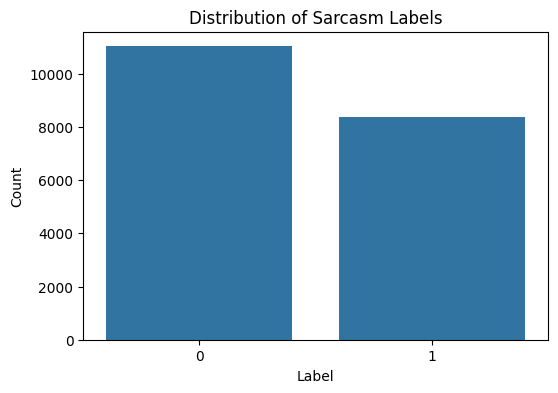

In [30]:
# Plot the distribution of labels
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title('Distribution of Sarcasm Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [31]:
df.value_counts('label')

label
0    11023
1     8385
Name: count, dtype: int64

## Final Preparation

The final step is to prepare the data for input into a deep learning model. This includes splitting the data into training and testing sets and vectorizing the text data.



In [38]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [39]:
# Split the data into training and testing sets
X = df['cleaned_comment']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [41]:
# Pad the sequences
max_len = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [42]:
# Display the shape of the padded data
print(f'Training data shape: {X_train_pad.shape}')
print(f'Testing data shape: {X_test_pad.shape}')

Training data shape: (15526, 63)
Testing data shape: (3882, 63)


In [35]:
# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [36]:
# Display the shape of the vectorized data
print(f'Training data shape: {X_train_vec.shape}')
print(f'Testing data shape: {X_test_vec.shape}')


Training data shape: (15526, 26616)
Testing data shape: (3882, 26616)


## Conclusion

This notebook has demonstrated the preprocessing steps for preparing a dataset of YouTube comments for sarcasm detection using deep learning. The steps include loading the dataset, cleaning the data, text preprocessing, and preparing the data for model training.

You can now proceed with training a deep learning model using the preprocessed data.

